In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
    # render plot with "plt.show()".
    

In [2]:
#Loading Rajan dataset
rajan_data = pd.read_csv('pre_post_enza_clin_rnaseq.csv')
rajan_data

,ID,Prostate-Post-R1,Prostate-Post-R2,Prostate-Post-R3,Prostate-Post-R4,Prostate-Post-R5,Prostate-Post-R6,Prostate-Post-R7,Prostate-Pre-R1,Prostate-Pre-R2,Prostate-Pre-R3,Prostate-Pre-R4,Prostate-Pre-R5,Prostate-Pre-R6,Prostate-Pre-R7
0,ENSG00000000003,263,473,695,739,925,862,672,97,1010,1190,1342,911,1014,1245
1,ENSG00000000005,0,0,5,0,4,1,4,0,0,6,11,5,0,0
2,ENSG00000000419,258,232,263,319,440,420,401,285,220,403,333,282,405,495
3,ENSG00000000457,170,156,160,190,293,121,158,109,150,276,188,256,102,158
4,ENSG00000000460,64,109,99,88,182,114,153,75,95,106,141,120,87,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,ENSG00000266258,3,3,7,2,4,15,10,17,4,2,1,8,16,10
19906,ENSG00000266326,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19907,ENSG00000266614,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19908,ENSG00000266714,10,52,56,74,55,41,47,2,30,35,37,45,21,11


In [3]:
#Loading 16D Transcriptomics dataset
RNAseq = pd.read_csv('Gene_counts_16D.csv')
RNAseq

,gene_id,Gene_name,Transcript_type,DMSO-1_S1_R1_001,DMSO-2_S2_R1_001,DMSO-3_S3_R1_001,24_hr-1_S4_R1_001,24_hr-2_S5_R1_001,24_hr-3_S6_R1_001,48_hr-1_S7_R1_001,...,144_hr-2_S14_R1_001,144_hr-3_S15_R1_001,since_7_30-1_S16_R1_001,since_7_30-2_S17_R1_001,since_7_30-3_S18_R1_001,DMSO Ave,LT ave,Fold,48 hr,Fold 48h
0,ENSG00000000003,TSPAN6,protein_coding,8.35,9.64,8.63,8.94,5.91,8.83,7.81,...,8.26,11.19,7.58,7.91,7.98,8.873333,7.823333,0.881668,8.063333,0.908715
1,ENSG00000000005,TNMD,lncRNA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,0.000000,NaN
2,ENSG00000000419,DPM1,protein_coding,69.12,73.69,63.84,65.76,60.50,62.46,63.06,...,61.56,63.03,46.82,57.18,49.47,68.883333,51.156667,0.742657,62.976667,0.914251
3,ENSG00000000457,SCYL3,protein_coding,6.42,7.13,6.34,7.37,7.34,7.54,8.26,...,7.91,8.30,4.60,5.79,4.95,6.630000,5.113333,0.771242,7.770000,1.171946
4,ENSG00000000460,C1orf112,protein_coding,15.33,18.73,15.64,16.05,13.43,15.82,13.38,...,9.70,10.38,7.50,7.51,6.85,16.566667,7.286667,0.439839,13.090000,0.790141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60617,ENSG00000288459,AL512357.2,lncRNA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,0.000000,NaN
60618,ENSG00000288460,AL138899.3,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,0.000000,NaN
60619,ENSG00000288473,AL669830.1,retained_intron,0.14,0.78,0.44,0.53,0.21,0.17,0.49,...,0.52,0.17,0.09,0.62,0.32,0.453333,0.343333,0.757353,0.493333,1.088235
60620,ENSG00000288484,AC091135.2,unprocessed_pseudogene,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,0.000000,NaN


In [4]:
#Feature selection based on shared genes
gold_genes = RNAseq.loc[:, 'gene_id'].values
rajan_genes = rajan_data.loc[:, 'ID'].values
gene_names = []
for i in range(0, len(rajan_genes)):
    if rajan_genes[i] in gold_genes:
        gene_names.append(rajan_genes[i])

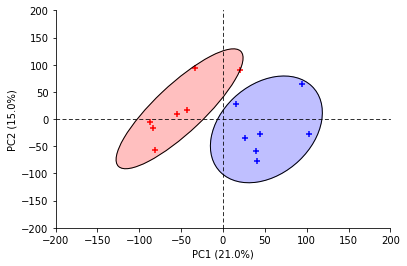

Explained Variance:
[0.20851504 0.14846223]


In [5]:
#Fitting to the Rajan Dataset
X_data_1_pre = rajan_data
X_data_1_pre = X_data_1_pre.drop_duplicates(subset='ID')
X_data_1_pre = X_data_1_pre.set_index('ID')
X_data_1 = X_data_1_pre.loc[gene_names, :].values
X_data_1 = np.transpose(X_data_1)
X_data_1_unnormalized = StandardScaler()
X_data_1 = X_data_1_unnormalized.fit_transform(X_data_1)

#Running PCA
components = PCA(n_components = 2)
components.fit(X_data_1)
X = components.transform(X_data_1)

PC1_values = []
PC2_values = []
for i in range(0, len(X)):
    PC1_values.append(X[i][0])
    PC2_values.append(X[i][1])
    
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:7]), np.array(PC2_values[:7]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[:7]), np.array(PC2_values[:7]), ax, n_std=2.0, facecolor='None', edgecolor='k')
confidence_ellipse(np.array(PC1_values[7:]), np.array(PC2_values[7:]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
confidence_ellipse(np.array(PC1_values[7:]), np.array(PC2_values[7:]), ax, n_std=2.0, facecolor='None', edgecolor='k')
plt.scatter(PC1_values[:7], PC2_values[:7], label='Post ADT', marker='+', c='r')
plt.scatter(PC1_values[7:], PC2_values[7:], label='Pre ADT', marker='+', c='b')
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0], 2) * 100) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1], 2) * 100) + '%)')
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

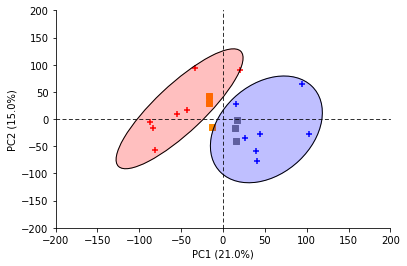

Explained Variance:
[0.20851504 0.14846223]
Coordinates:
[[ 19.84738658  90.56033252]
 [-33.18262344  93.34561269]
 [-43.18742689  15.87587958]
 [-55.41243791  10.20021967]
 [-80.70773089 -56.69461794]
 [-83.61855846 -15.61273216]
 [-86.69411929  -5.12962588]
 [ 94.82569314  64.11403754]
 [ 15.85537863  27.84664735]
 [ 44.09338132 -26.90426356]
 [ 40.14358804 -77.17766628]
 [102.38719663 -27.16198457]
 [ 26.07136045 -34.0964885 ]
 [ 39.57891209 -59.16535044]]
[[ 14.23150998 -17.20352428]
 [ 15.41006837 -41.02424596]
 [ 17.22323231  -1.3881705 ]
 [-17.25462671  43.37416522]
 [-12.59922131 -14.04151409]
 [-17.01096265  30.28328962]]


In [6]:
#Projecting 16D samples into Rajan featurespace
X_data_pre = RNAseq.drop(['Gene_name', 'Transcript_type', '24_hr-1_S4_R1_001', '24_hr-2_S5_R1_001', '24_hr-3_S6_R1_001', '48_hr-1_S7_R1_001', '48_hr-2_S8_R1_001', '48_hr-3_S9_R1_001', '96_hr-1_S10_R1_001', '96_hr-2_S11_R1_001', '96_hr-3_S12_R1_001', '144_hr-1_S13_R1_001', '144_hr-2_S14_R1_001', '144_hr-3_S15_R1_001', 'DMSO Ave', 'LT ave', 'Fold', '48 hr', 'Fold 48h'], axis=1)
X_data_pre = X_data_pre.drop_duplicates(subset='gene_id')
X_data_pre = X_data_pre.set_index('gene_id')
X_data = X_data_pre.loc[gene_names, :].values
X_data = np.transpose(X_data)
X_data_unnormalized = StandardScaler()
X_data = X_data_unnormalized.fit_transform(X_data)

X_proj = components.transform(X_data)

for i in range(0, len(X_proj)):
    PC1_values.append(X_proj[i][0])
    PC2_values.append(X_proj[i][1])
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:7]), np.array(PC2_values[:7]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[:7]), np.array(PC2_values[:7]), ax, n_std=2.0, facecolor='None', edgecolor='k')
confidence_ellipse(np.array(PC1_values[7:14]), np.array(PC2_values[7:14]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
confidence_ellipse(np.array(PC1_values[7:14]), np.array(PC2_values[7:14]), ax, n_std=2.0, facecolor='None', edgecolor='k')
plt.scatter(PC1_values[:7], PC2_values[:7], label='Post ADT', marker='+', c='r')
plt.scatter(PC1_values[7:14], PC2_values[7:14], label='Pre ADT', marker='+', c='b')
plt.scatter(PC1_values[14:17], PC2_values[14:17], label='Vehicle', marker='s', c='grey')
plt.scatter(PC1_values[17:], PC2_values[17:], label='LT ENZA', marker='s', c='darkorange')
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0], 2) * 100) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1], 2) * 100) + '%)')
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

print("Coordinates:")
print(X)
print(X_proj)

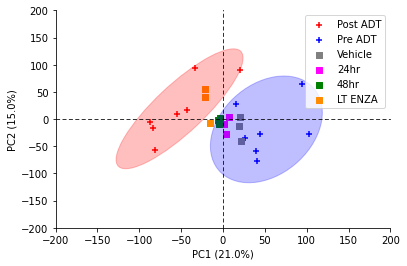

Explained Variance:
[0.20851504 0.14846228]
Coordinates:
[[ 19.8483889   90.58092332]
 [-33.18242223  93.34605871]
 [-43.18850465  15.85479166]
 [-55.41373334  10.17536097]
 [-80.70770252 -56.69398876]
 [-83.61964448 -15.63260789]
 [-86.69160583  -5.08160698]
 [ 94.82526045  64.10555055]
 [ 15.85502698  27.84307047]
 [ 44.09466145 -26.88092687]
 [ 40.1442802  -77.16472541]
 [102.38715077 -27.16328813]
 [ 26.06977209 -34.12412161]
 [ 39.5790722  -59.16449003]]
[[ 19.04020803 -13.00559928]
 [ 21.03252798 -39.72221994]
 [ 20.48680937   4.10105265]
 [  4.14807014 -27.31212402]
 [  6.81626572   4.63971451]
 [  0.83541223  -9.22523297]
 [ -4.71318573  -9.49159324]
 [ -6.05041916  -1.27558609]
 [ -3.72966709   1.88426793]
 [-21.72420734  55.71514797]
 [-15.20194863  -6.47412613]
 [-20.93986551  40.16629861]]


In [7]:
#Fitting to the Rajan Dataset with time course data
X_data_1_pre = rajan_data
X_data_1_pre = X_data_1_pre.drop_duplicates(subset='ID')
X_data_1_pre = X_data_1_pre.set_index('ID')
X_data_1 = X_data_1_pre.loc[gene_names, :].values
X_data_1 = np.transpose(X_data_1)
X_data_1_unnormalized = StandardScaler()
X_data_1 = X_data_1_unnormalized.fit_transform(X_data_1)

#Running PCA
components = PCA(n_components = 2)
components.fit(X_data_1)
X = components.transform(X_data_1)

PC1_values = []
PC2_values = []
for i in range(0, len(X)):
    PC1_values.append(X[i][0])
    PC2_values.append(X[i][1])
    

X_data_pre = RNAseq.drop(['Gene_name', 'Transcript_type', '96_hr-1_S10_R1_001', '96_hr-2_S11_R1_001', '96_hr-3_S12_R1_001', '144_hr-1_S13_R1_001', '144_hr-2_S14_R1_001', '144_hr-3_S15_R1_001', 'DMSO Ave', 'LT ave', 'Fold', '48 hr', 'Fold 48h'], axis=1)
X_data_pre = X_data_pre.drop_duplicates(subset='gene_id')
X_data_pre = X_data_pre.set_index('gene_id')
X_data = X_data_pre.loc[gene_names, :].values
X_data = np.transpose(X_data)
X_data_unnormalized = StandardScaler()
X_data = X_data_unnormalized.fit_transform(X_data)

X_proj = components.transform(X_data)

for i in range(0, len(X_proj)):
    PC1_values.append(X_proj[i][0])
    PC2_values.append(X_proj[i][1])
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:7]), np.array(PC2_values[:7]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[7:14]), np.array(PC2_values[7:14]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
plt.scatter(PC1_values[:7], PC2_values[:7], label='Post ADT', marker='+', c='r')
plt.scatter(PC1_values[7:14], PC2_values[7:14], label='Pre ADT', marker='+', c='b')
plt.scatter(PC1_values[14:17], PC2_values[14:17], label='Vehicle', marker='s', c='grey')
plt.scatter(PC1_values[17:20], PC2_values[17:20], label='24hr', marker='s', c='magenta')
plt.scatter(PC1_values[20:23], PC2_values[20:23], label='48hr', marker='s', c='g')
plt.scatter(PC1_values[23:], PC2_values[23:], label='LT ENZA', marker='s', c='darkorange')
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0], 2) * 100) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1], 2) * 100) + '%)')
#plt.title('PCA')
plt.legend()
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

print("Coordinates:")
print(X)
print(X_proj)